# Linguagem, Bibliotecas e Pacotes

In [48]:
# Import libs

import numpy as np
import pandas as pd
import missingno as msno
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


# Leitura dos Dados

In [27]:
# Read NBA data from excel file

nba_data = pd.read_excel('nba_data.xlsx')

In [28]:
# Drop "Unnamed: 0" column

nba_data.drop(['Unnamed: 0'], axis=1, inplace=True)
nba_data.head()

,HOME_WL,GP_x,W_x,L_x,W_PCT_x,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,...,REB_RANK_y,AST_RANK_y,TOV_RANK_y,STL_RANK_y,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y
0,W,1,1,0,1.000,48.0,42.0,92.0,0.457,11.0,...,12,15,14,2,6,2,25,8,8,7
1,W,2,1,1,0.500,48.0,43.0,81.0,0.531,13.0,...,10,17,24,21,2,7,7,27,18,9
2,W,3,2,1,0.667,49.7,42.0,86.3,0.486,11.0,...,8,9,9,14,28,30,10,7,17,27
3,L,4,3,1,0.750,49.3,42.5,86.0,0.494,10.8,...,9,7,16,26,3,21,23,17,11,25
4,W,5,3,2,0.600,49.0,41.6,86.0,0.484,15.2,...,24,14,23,21,5,7,19,23,20,11


# Análise Inicial

In [29]:
# Get nba_data dataframa shape

nba_data.shape

(6963, 105)

In [30]:
# Get nba_data dataframe columns

nba_data.columns

Index(['HOME_WL', 'GP_x', 'W_x', 'L_x', 'W_PCT_x', 'MIN_x', 'FGM_x', 'FGA_x',
       'FG_PCT_x', 'FG3M_x',
       ...
       'REB_RANK_y', 'AST_RANK_y', 'TOV_RANK_y', 'STL_RANK_y', 'BLK_RANK_y',
       'BLKA_RANK_y', 'PF_RANK_y', 'PFD_RANK_y', 'PTS_RANK_y',
       'PLUS_MINUS_RANK_y'],
      dtype='object', length=105)

In [31]:
# Get nba_data dataframe describe

nba_data.describe()

,GP_x,W_x,L_x,W_PCT_x,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,FG3A_x,...,REB_RANK_y,AST_RANK_y,TOV_RANK_y,STL_RANK_y,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y
count,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,...,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000
mean,39.421657,19.688640,19.733017,0.498711,48.315712,40.513055,88.108358,0.459894,11.760606,33.007928,...,15.370243,15.345541,15.321844,15.419647,15.286514,15.244004,15.371248,15.439466,15.327876,15.286227
std,22.634354,13.039842,13.080083,0.173915,0.367160,2.042301,3.016847,0.019334,1.826029,4.643194,...,8.632790,8.664255,8.648501,8.662756,8.643116,8.639085,8.656732,8.616650,8.637555,8.633215
min,1.000000,0.000000,0.000000,0.000000,48.000000,25.000000,73.000000,0.298000,4.500000,16.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,9.000000,9.000000,0.390000,48.100000,39.100000,86.100000,0.448000,10.600000,30.100000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,39.000000,18.000000,18.000000,0.500000,48.300000,40.500000,88.000000,0.461000,11.600000,32.800000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,15.000000,15.000000
75%,59.000000,29.000000,29.000000,0.613000,48.400000,41.900000,90.000000,0.472000,12.800000,35.850000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
max,81.000000,64.000000,64.000000,1.000000,58.000000,54.000000,117.000000,0.560000,23.000000,57.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [32]:
# Get classes

nba_data['HOME_WL'].value_counts()

HOME_WL
W    3936
L    3027
Name: count, dtype: int64

In [33]:
# Get nba_data dataframe info

nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Columns: 105 entries, HOME_WL to PLUS_MINUS_RANK_y
dtypes: float64(46), int64(58), object(1)
memory usage: 5.6+ MB


# Chegagem de valores nulos

<Axes: >

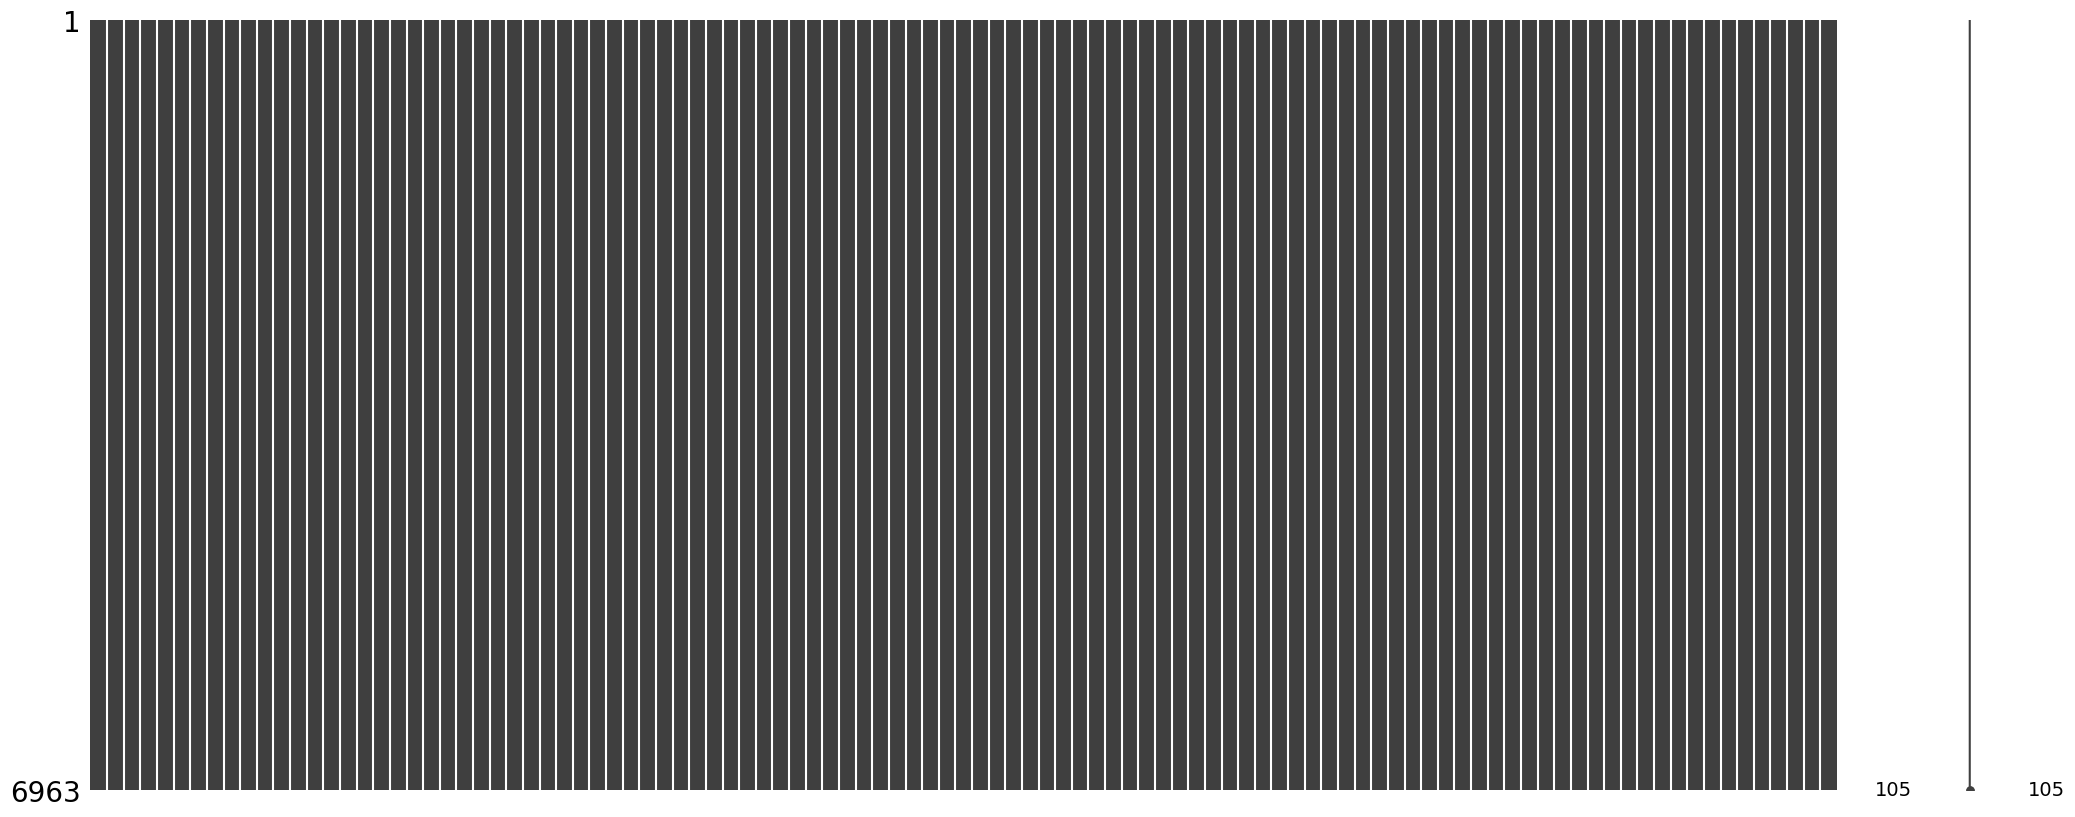

In [9]:
msno.matrix(nba_data)

# Relatório Pandas Profile

    Foi gerado o 'Pandas Profile Report' que oferece uma análise extensa do conjunto de dados que está sendo abordado.

In [9]:
# Generate and export as a .html file the Pandas Profile Report of the nba_shots dataframe

profile_data = ProfileReport(nba_data, title ='nba_data')
profile_data.to_file("nba_data_pandas_profile_report.html")

Summarize dataset: 100%|█████████▉| 10927/10930 [23:44<00:01,  2.61it/s, Detecting duplicates]                        c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return func(*args, **kwargs)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return func(*args, **kwargs)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\sit

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\arthu\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\arthu\AppData\Local\Temp\ipykernel_15660\4262361495.py", line 4, in <module>
    profile_data.to_file("nba_data_pandas_profile_report.html")
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\typeguard\__init__.py", line 1033, in wrapper
    retval = func(*args, **kwargs)
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_profiling\profile_report.py", line 309, in to_file
    data = self.to_html()
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\typeguard\__init__.py", line 1033, in wrapper
    retval = func(*args, **kwargs)
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_profiling\profile_report.py", line 420, in to_ht

Error in callback <function _draw_all_if_interactive at 0x000002B3302CC670> (for post_execute):


In [ ]:
# Show Profile Report in this notebook

profile_data.to_notebook_iframe()

# Previsão de resultados utilizando Redes Neurais

In [26]:
# Turn categorical column HOME_WL into numerial

nba_data['HOME_WL'] = nba_data['HOME_WL'].apply(lambda x: 0 if x == 'W' else 1)
nba_data.head()

,HOME_WL,GP_x,W_x,L_x,W_PCT_x,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,...,REB_RANK_y,AST_RANK_y,TOV_RANK_y,STL_RANK_y,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y
0,0,1,1,0,1.000,48.0,42.0,92.0,0.457,11.0,...,12,15,14,2,6,2,25,8,8,7
1,0,2,1,1,0.500,48.0,43.0,81.0,0.531,13.0,...,10,17,24,21,2,7,7,27,18,9
2,0,3,2,1,0.667,49.7,42.0,86.3,0.486,11.0,...,8,9,9,14,28,30,10,7,17,27
3,1,4,3,1,0.750,49.3,42.5,86.0,0.494,10.8,...,9,7,16,26,3,21,23,17,11,25
4,0,5,3,2,0.600,49.0,41.6,86.0,0.484,15.2,...,24,14,23,21,5,7,19,23,20,11


In [35]:
# Separate database in train and test

X = nba_data.loc[:, nba_data.columns != 'HOME_WL']
y = nba_data['HOME_WL']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state = 100, 
                                                    stratify = y,
                                                    )

In [39]:
# Check columns with variance equal to zero and drop them

zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)
X_test = zero_var_filter.transform(X_test)
print('X_train e X_test possuíam', (zero_var_filter.variances_ == 0).sum(), 'atributo(s) com variância igual a zero')

print(zero_var_filter.variances_ == 0)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train e X_test possuíam 0 atributo(s) com variância igual a zero
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
X_train: (5570, 104)
X_test: (1393, 104)
y_train: (5570,)
y_test: (1393,)


In [41]:
# Normalize data

preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-1.69871695, -1.43549515, -1.50708865,  2.8683292 , 12.51030366,
         2.19072241,  4.58418214, -0.9832141 , -0.96207454, -0.42826865,
        -1.4105554 ,  3.06768965,  3.15364885,  0.08081571,  5.45955061,
         0.8029606 ,  3.79042519,  1.27877106,  0.27529408, -2.50231578,
         2.17659403,  7.09067048,  4.63510955,  2.55203741,  2.60156713,
         0.37830359, -1.00043106, -1.49708438, -1.56026698, -1.61451158,
        -1.53418061, -0.86179546, -1.6739958 ,  0.7611607 ,  0.06774127,
         0.17854898,  0.28808452, -1.43170442, -1.5481327 , -0.39727131,
        -1.67518957, -0.16072332, -1.44635636, -0.74647144, -0.74741022,
         1.003077  , -0.9784591 ,  1.45152328,  1.22591291, -0.9575492 ,
        -1.44202067, -0.29092174, -1.7011583 , -1.42585638, -1.52496405,
         2.88918722, -0.85685594, -1.25573562, -3.00886405,  1.08536821,
        -0.42240468, -0.6368677 ,  0.41438628,  0.73876518,  1.65298094,
        -1.84474978, -2.91812771,  3.70109897,  1.4

In [43]:
# Train Neural Network

NumberOfClasses = len(y_train.unique())
NumberOfClasses

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
print(y_train)

[1 0 1 ... 1 0 1]


In [57]:
# Neural Network

RN = Sequential()
RN.add(Dense(10,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(NumberOfClasses,activation = 'sigmoid'))
RN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                1050      


                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1072 (4.19 KB)
Trainable params: 1072 (4.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Training

RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 200)

Epoch 1/200
175/175 [==============================] - 0s 946us/step - loss: 0.7082 - accuracy: 0.5072
Epoch 2/200
175/175 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6005
Epoch 3/200
175/175 [==============================] - 0s 991us/step - loss: 0.6690 - accuracy: 0.6099
Epoch 4/200
175/175 [==============================] - 0s 958us/step - loss: 0.6630 - accuracy: 0.6145
Epoch 5/200
175/175 [==============================] - 0s 951us/step - loss: 0.6586 - accuracy: 0.6235
Epoch 6/200
175/175 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6235
Epoch 7/200
175/175 [==============================] - 0s 1000us/step - loss: 0.6518 - accuracy: 0.6244
Epoch 8/200
175/175 [==============================] - 0s 940us/step - loss: 0.6492 - accuracy: 0.6282
Epoch 9/200
175/175 [==============================] - 0s 963us/step - loss: 0.6468 - accuracy: 0.6311
Epoch 10/200
175/175 [==============================] - 0s 989us/step - loss

In [59]:
# Evaluation

score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.631912887096405
Test accuracy: 0.6403445601463318


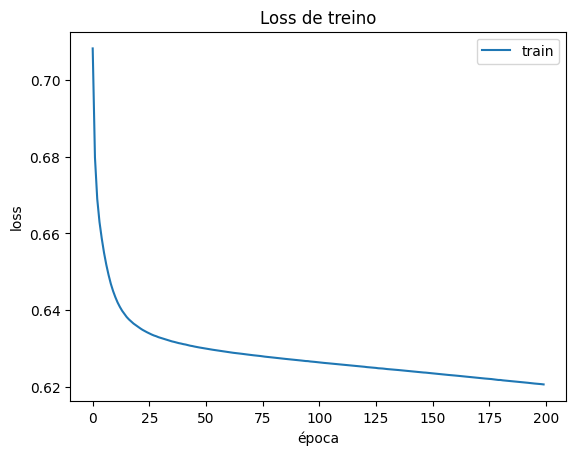

In [60]:
# Gráfico do treinamento: custo do treino e validação

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.title('Loss de treino')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();